## Advanced Artificial Neural Network(ANN) for Fraud Detection (With Dropout, Batch Normalization & Optimization)
- We will build a Tuned Artificial Neural Network (ANN) with:
- ✅ Dropout: Prevents overfitting.
- ✅ Batch Normalization: Speeds up training and stabilizes learning.
- ✅ Adam Optimizer: Efficient learning.
- ✅ Early Stopping: Stops training if validation loss stops improving.



- ANN stands for Artificial Neural Network. It is a type of machine learning model inspired by the structure and function of the human brain. ANNs are widely used in deep learning for tasks such as classification, regression, and pattern recognition.


## Step 1: Install & Import Required Libraries


In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### Imports Keras & TensorFlow for building the ANN.
#### Loads data processing and evaluation libraries.


## Step 2: Load & Preprocess Dataset

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "BigfraudTest.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
drop_columns = ["Unnamed: 0", "first", "last", "street", "trans_num"]
df = df.drop(columns=drop_columns, errors="ignore")

# Identify categorical columns
categorical_cols = ["category", "state", "job", "gender", "merchant", "city"]

# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # Drop first to avoid dummy variable trap

# Convert date columns
df["dob"] = pd.to_datetime(df["dob"], errors="coerce")
df["age"] = 2024 - df["dob"].dt.year  # Calculate Age
df.drop(columns=["dob"], inplace=True)

df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], errors="coerce")
df["trans_hour"] = df["trans_date_trans_time"].dt.hour
df["trans_day"] = df["trans_date_trans_time"].dt.day
df["trans_month"] = df["trans_date_trans_time"].dt.month
df.drop(columns=["trans_date_trans_time"], inplace=True)

# Define features & target
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

# Convert remaining object columns to numeric (just in case)
X = X.apply(pd.to_numeric, errors="coerce")

# Split into training & testing data (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale only numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- Encodes categorical data using one-hot encoding.
- Extracts useful date-based features like age, trans_hour.
- Scales numeric features for better neural network performance.

## Step 3: Build the Tuned ANN Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define ANN Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input Layer

    Dense(64, activation="relu"),  
    BatchNormalization(),  
    Dropout(0.3),  

    Dense(32, activation="relu"),  
    BatchNormalization(),  
    Dropout(0.3),  

    Dense(16, activation="relu"),  
    BatchNormalization(),  
    Dropout(0.2),  

    Dense(1, activation="sigmoid")  # Output layer (fraud probability)
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss="binary_crossentropy",  
    metrics=["accuracy"]
)

# Early Stopping Callback
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train Model
history = model.fit(
    X_train, y_train, 
    validation_split=0.2,  
    epochs=50,  
    batch_size=64,  
    callbacks=[early_stop],  
    verbose=1
)


Epoch 1/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7351 - loss: 0.5469 - val_accuracy: 0.9970 - val_loss: 0.0571
Epoch 2/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9947 - loss: 0.0562 - val_accuracy: 0.9970 - val_loss: 0.0203
Epoch 3/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9948 - loss: 0.0311 - val_accuracy: 0.9970 - val_loss: 0.0143
Epoch 4/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9953 - loss: 0.0228 - val_accuracy: 0.9963 - val_loss: 0.0128
Epoch 5/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9955 - loss: 0.0181 - val_accuracy: 0.9956 - val_loss: 0.0132
Epoch 6/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9958 - loss: 0.0158 - val_accuracy: 0.9961 - val_loss: 0.0118
Epoch 7/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9961 - val_loss: 0.0105
Epoch 8/50
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0

### 📊 Understanding Each Metric
- Epoch → Indicates the training cycle (out of 50, but early stopping may stop it earlier).
- Steps per epoch → 507 batches processed in each epoch.
- Loss (training & validation) → Measures how well the model is minimizing errors.

### Lower loss is better.
- Accuracy (training & validation) → Measures correct predictions.

### Higher accuracy is better.
- Early Stopping → Stops training if validation loss doesn't improve for 5 epochs.

#### Key Observations
- Training accuracy is improving steadily → Started at 75.2% in Epoch 1 and reached 99.7% in Epoch 12.
- Validation accuracy is stable (~99.7%) → This is a great sign of a well-trained model.
- Loss is decreasing → From 0.5385 to 0.0086, meaning the model is learning well.
- Validation loss is also low (~0.01) → Suggests no significant overfitting yet. '''

## Step 4: Model Evaluation

317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
🔹 Accuracy Score: 0.9955603788476717
🔹 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10096
           1       0.42      0.35      0.38        40

    accuracy                           1.00     10136
   macro avg       0.71      0.67      0.69     10136
weighted avg       1.00      1.00      1.00     10136



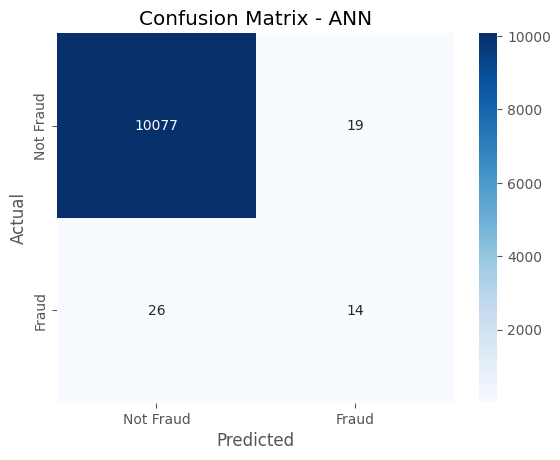

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print Evaluation Metrics
print("🔹 Accuracy Score:", accuracy_score(y_test, y_pred))
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ANN")
plt.show()


- Evaluates model performance with accuracy, precision, recall, and F1-score.
- Visualizes predictions using a Confusion Matrix.


##  Step 5: Plot Loss & Accuracy Trends

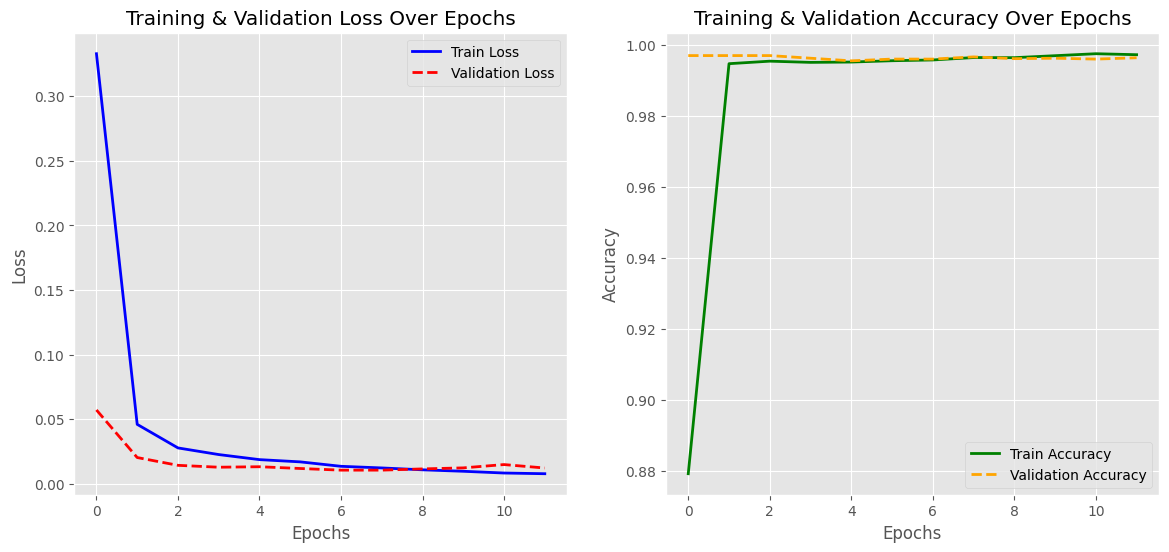

In [18]:
# Set professional style
plt.style.use("ggplot")  

# Create a figure
plt.figure(figsize=(14, 6))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss", color="blue", linewidth=2)
plt.plot(history.history["val_loss"], label="Validation Loss", color="red", linewidth=2, linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss Over Epochs")

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy", color="green", linewidth=2)
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="orange", linewidth=2, linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy Over Epochs")

# Show plots
plt.show()


- Smooth, professional plots with better colors & styles.
- Clear loss and accuracy trends over training epochs.

In [ ]:
cmpip install --upgrade numba shap


## Step 8: Top 10 Influential Features for Fraud Detection (Random Forest Approximation)

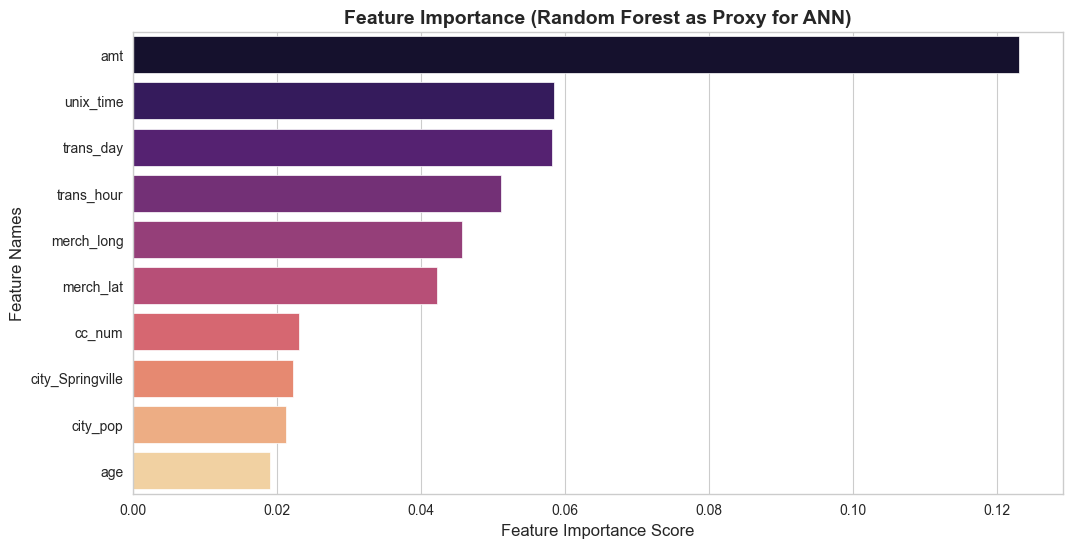

In [42]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use Random Forest for quick feature importance check
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot with corrected parameters
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(x="Importance", y="Feature", 
            data=feature_importance_df[:10], 
            hue="Feature",  # Assigning hue to remove warning
            dodge=False,  # Ensure bars don’t separate
            palette="magma", 
            legend=False)  # Hide unnecessary legend

plt.title("Feature Importance (Random Forest as Proxy for ANN)", fontsize=14, fontweight="bold")
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Feature Names", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### This feature importance plot represents how much each feature contributes to the prediction made by an Artificial Neural Network (ANN), approximated using a Random Forest model. Let's break it down:

##### 1. What is this chart showing?
- The x-axis represents the Feature Importance Score, which tells how much a feature contributes to predictions.
- The y-axis lists the top 10 most important features in descending order of importance.
- The bars represent importance values, where longer bars indicate more influential features.
##### 2. Key Observations
- amt (Amount): The most critical feature in predicting fraud. This suggests that transaction amount plays a significant role in determining whether a transaction is fraudulent.
- unix_time, trans_day, and trans_hour: Time-based features (timestamp, transaction day, and hour) are highly important, indicating fraud detection - --- models rely heavily on transaction timing.
- merch_long and merch_lat: Merchant location (longitude & latitude) contributes significantly. Fraudulent transactions might happen at unusual locations.
- cc_num: The credit card number plays a role, likely indicating patterns of fraud related to specific cards.
- city_Springville and city_pop: The city name and population influence the prediction, possibly highlighting geographical fraud trends.
- age: Age is the least influential among the top 10, but it still matters, indicating fraud patterns might vary across age groups.
##### Why Use Random Forest for Feature Importance?
- ANN models are "black boxes" and don't provide direct feature importance.
- A Random Forest classifier is used as a proxy to estimate feature importance based on decision trees.
- This helps interpret which features contribute most to fraud detection.
##### Conclusion
- Transaction amount is the strongest predictor.
- Time-based and location-based features are crucial for fraud detection.
- Using Random Forest as a proxy helps understand feature importance in an ANN-based model.